
# Time Series Forecasting Using RNN / LSTM Neural Networks.


### Problem 

Forecasting future web traffic (view counts) for thousands of Wikipedia articles.
We will train and fit Time Series models on a training set of 70K time series of Wikipedia article view counts and use it to forecast the future views for a single day or multiple days.

We will explore RNN ( Recurrent Neural Networks ), particularly LSTM ( Long Short Term Memory ) variant of RNN to train and forecast.


### Data Set

The data set was taken from https://www.kaggle.com/c/web-traffic-time-series-forecasting/

The training dataset consists of approximately 145k time series. Each of these time series represent a number of daily views of a different Wikipedia article, starting from July, 1st, 2015 up until December 31st, 2016. 



### Steps

#### 1. Read Data


#### 2. Data Cleaning


#### 3. Data Preparation and Visualization

##### &emsp;      3.1 Checking and Removing Outliers

##### &emsp;     3.2 Scaling of Time Series Data

#### 4. Modeling and Forecast ( single day )

##### &emsp;     4.1 Baseline Models

##### &emsp; &emsp; 4.1.1 Naive Forecast
##### &emsp; &emsp; 4.1.1 Linear Regression Model

##### &emsp;     4.2 Simple RNN

##### &emsp;     4.3 Deep RNN

##### &emsp;     4.4 LSTM Model

#### 5. Forecasting For Several Time Steps (days) ahead

##### &emsp;     5.1 Train on 'n' days values as a whole and forecast for days n+1, n+2.....

##### &emsp;     5.2 Sequence-to-Sequence Model - Train on 'n' days values, forecasting next k values at each time step (day).






## 1. Read Data 

##### Import libraries

In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
from datetime import datetime

from pandas import Series
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import tensorflow as tf
from tensorflow import keras 

import warnings
warnings.filterwarnings("ignore")

np.set_printoptions(suppress=True) 

ModuleNotFoundError: No module named 'tensorflow'

##### Read csv file

In [2]:
file = r'D:\18-DS\data\Datasets-Large\Web_Traffic_Time_Series_Forecasting_train_1.csv'
df = pd.read_csv(file)

In [3]:
df

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,Underworld_(serie_de_películas)_es.wikipedia.o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,13.0,12.0,13.0,3.0,5.0,10.0
145059,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145060,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145061,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
len(df.Page.str.lower().unique())

144925

In [5]:
df.columns

Index(['Page', '2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
       '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09',
       ...
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object', length=551)

We see that the data set contains nearly 145K rows and 551 columns. Each row is a unique time series. For each time series, you are provided the name of the article as well as the type of traffic that this time series represent (all, mobile, desktop, spider). The columns are daily dates ranging starting from 1st July 2015 to 31st December 2016. So each time series is of 550 days length. 


## 2. Data Cleaning 

We see a lot of missing (NaN) values in the data set.  Unfortunately, the data source for this dataset does not distinguish between traffic values of zero and missing values. A missing value may mean the traffic was zero or that the data is not available for that day. <br>

Due to the lack of clarity about the missing values, we can safely ignore those timeseries with null values as the data set is huge enough for time series modelling.

In [6]:
new_df = df.loc[~df.isnull().any(axis=1)]

In [7]:
new_df.shape

(117277, 551)

In [8]:
new_df

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
5,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,16.0,27.0,8.0,17.0,32.0,19.0,23.0,17.0,17.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144944,Chichén_Itzá_es.wikipedia.org_all-access_spider,8.0,13.0,19.0,14.0,6.0,5.0,10.0,9.0,5.0,...,15.0,18.0,12.0,6.0,5.0,14.0,10.0,174.0,8.0,19.0
144945,Fecundación_es.wikipedia.org_all-access_spider,29.0,16.0,6.0,11.0,33.0,4.0,11.0,16.0,10.0,...,8.0,8.0,13.0,3.0,6.0,10.0,16.0,10.0,7.0,8.0
144946,Gran_Hermano_VIP_(España)_es.wikipedia.org_all...,4.0,25.0,7.0,11.0,6.0,6.0,16.0,11.0,23.0,...,12.0,299.0,46.0,5.0,11.0,77.0,523.0,110.0,171.0,43.0
144947,Modelo_atómico_de_Thomson_es.wikipedia.org_all...,0.0,2.0,6.0,6.0,7.0,5.0,4.0,6.0,7.0,...,13.0,1.0,5.0,11.0,9.0,11.0,6.0,7.0,9.0,4.0


In [11]:
new_df.isnull().sum(axis=1)#.value_counts()

0         0
1         0
2         0
3         0
5         0
         ..
144944    0
144945    0
144946    0
144947    0
144948    0
Length: 117277, dtype: int64

In [12]:
new_df = new_df.reset_index().drop(['index'], axis=1)
new_df

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,16.0,27.0,8.0,17.0,32.0,19.0,23.0,17.0,17.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117272,Chichén_Itzá_es.wikipedia.org_all-access_spider,8.0,13.0,19.0,14.0,6.0,5.0,10.0,9.0,5.0,...,15.0,18.0,12.0,6.0,5.0,14.0,10.0,174.0,8.0,19.0
117273,Fecundación_es.wikipedia.org_all-access_spider,29.0,16.0,6.0,11.0,33.0,4.0,11.0,16.0,10.0,...,8.0,8.0,13.0,3.0,6.0,10.0,16.0,10.0,7.0,8.0
117274,Gran_Hermano_VIP_(España)_es.wikipedia.org_all...,4.0,25.0,7.0,11.0,6.0,6.0,16.0,11.0,23.0,...,12.0,299.0,46.0,5.0,11.0,77.0,523.0,110.0,171.0,43.0
117275,Modelo_atómico_de_Thomson_es.wikipedia.org_all...,0.0,2.0,6.0,6.0,7.0,5.0,4.0,6.0,7.0,...,13.0,1.0,5.0,11.0,9.0,11.0,6.0,7.0,9.0,4.0


##### We have removed the NaN values and still left with over 100K time series data. <br>
Let us take a backup of the df

In [13]:
new_df_copy = new_df.copy()

##### Drop the Page column as it is not necessary

In [14]:
new_df = new_df.drop(['Page'], axis=1)

In [15]:
new_df.head(10)

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,7.0,...,16.0,27.0,8.0,17.0,32.0,19.0,23.0,17.0,17.0,50.0
5,118.0,26.0,30.0,24.0,29.0,127.0,53.0,37.0,20.0,32.0,...,64.0,35.0,35.0,28.0,20.0,23.0,32.0,39.0,32.0,17.0
6,5.0,23.0,14.0,12.0,9.0,9.0,35.0,15.0,14.0,22.0,...,34.0,105.0,72.0,36.0,33.0,30.0,36.0,38.0,31.0,97.0
7,6.0,3.0,5.0,12.0,6.0,5.0,4.0,13.0,9.0,15.0,...,25.0,17.0,22.0,29.0,30.0,29.0,35.0,44.0,26.0,41.0
8,2.0,1.0,4.0,4.0,2.0,6.0,3.0,6.0,9.0,11.0,...,8.0,17.0,18.0,48.0,19.0,14.0,9.0,23.0,11.0,7.0
9,2.0,5.0,5.0,1.0,3.0,3.0,5.0,3.0,17.0,3.0,...,5.0,4.0,4.0,5.0,2.0,9.0,7.0,4.0,5.0,0.0


Change the column names from dates to time steps which will help us to manipulate the data later

In [16]:
new_df.columns = [ i for i,x in enumerate(new_df.columns)]
    
new_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,540,541,542,543,544,545,546,547,548,549
0,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,7.0,...,16.0,27.0,8.0,17.0,32.0,19.0,23.0,17.0,17.0,50.0
5,118.0,26.0,30.0,24.0,29.0,127.0,53.0,37.0,20.0,32.0,...,64.0,35.0,35.0,28.0,20.0,23.0,32.0,39.0,32.0,17.0
6,5.0,23.0,14.0,12.0,9.0,9.0,35.0,15.0,14.0,22.0,...,34.0,105.0,72.0,36.0,33.0,30.0,36.0,38.0,31.0,97.0
7,6.0,3.0,5.0,12.0,6.0,5.0,4.0,13.0,9.0,15.0,...,25.0,17.0,22.0,29.0,30.0,29.0,35.0,44.0,26.0,41.0
8,2.0,1.0,4.0,4.0,2.0,6.0,3.0,6.0,9.0,11.0,...,8.0,17.0,18.0,48.0,19.0,14.0,9.0,23.0,11.0,7.0
9,2.0,5.0,5.0,1.0,3.0,3.0,5.0,3.0,17.0,3.0,...,5.0,4.0,4.0,5.0,2.0,9.0,7.0,4.0,5.0,0.0


In [17]:
new_df = new_df.dropna()
new_df.shape

(117277, 550)

In [18]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117277 entries, 0 to 117276
Columns: 550 entries, 0 to 549
dtypes: float64(550)
memory usage: 493.0 MB


## 3. Data Preparation and Visualization

##### Let us take maximum time steps as 160 ( 160 days ). <br>

RNNs require data to be fed in 3-dimensions - [ batch-size, Time-Steps, Number of elements in a single timestep ]

So we first convert all the data in to 3-D array.



In [19]:

max_steps = 160

master_series = []

for i in range(len(new_df)):
    
    ### Skip the time series if it has all values as 0
    if (max(new_df.iloc[i, 0:max_steps]) == 0 ):
        continue
    
      
    myseries = np.array(new_df.iloc[i][0:max_steps])
    master_series.append(myseries)
    
master_series = np.array(master_series) 
master_series = master_series[..., np.newaxis].astype(np.float32)

master_series.shape

(117273, 160, 1)

### 3.1 Checking and Removing Outliers

In [21]:
master_series_values = master_series.reshape(-1,1)

print(np.percentile(master_series_values, [1, 5, 25, 50, 75, 95, 98, 99]))
print(master_series_values.mean())
print(master_series_values.max())


[   1.    3.   21.  156.  667. 3322. 6447. 9883.]
1361.4857
27562968.0


We see that there are extremely high values in our time series like the max value seen above. <br>
And the value at 99th percentile is just 9883. 
So there are clearly some outliers and they are somewhere beyond 99th percentile. <br>
Let us take only till 99th percentile for our analysis.

In [22]:
perc_99 = np.percentile(master_series_values,99)

### Master series has 117273 time series samples. 
### Check each individual time series sample and include it only if it has values less than 99th percentile of whole data.

master_wo_outliers = [master_series[i] for i in range(0, master_series.shape[0]) \
                      if (max(master_series[i,:]) <= perc_99)]

### Convert list to array
master_wo_outliers = np.array(master_wo_outliers)

print(master_wo_outliers.shape)

### Check outliers again
print(np.percentile(master_wo_outliers, [0, 25, 50, 75, 98, 99]))
print(master_wo_outliers.max())

(102220, 160, 1)
[   0.   16.  106.  462. 2788. 3668.]
9882.0


In [23]:
### Check the sanity of the time series dimensions after removal of outliers
print(master_wo_outliers[0, :5])
print()
print(master_series[0, :5])
print()
print(master_wo_outliers[10, :5])
print()
print(master_series[10, :5])

[[18.]
 [11.]
 [ 5.]
 [13.]
 [14.]]

[[18.]
 [11.]
 [ 5.]
 [13.]
 [14.]]

[[ 8.]
 [27.]
 [ 9.]
 [25.]
 [25.]]

[[ 8.]
 [27.]
 [ 9.]
 [25.]
 [25.]]


Now we have 102220 time series samples after removal of outliers.

In [24]:
master_series_orig = master_series.copy()
master_wo_outliers_copy = master_wo_outliers.copy()

In [25]:
master_series = master_wo_outliers

In [26]:
master_series[0:3, 0:5]

array([[[18.],
        [11.],
        [ 5.],
        [13.],
        [14.]],

       [[11.],
        [14.],
        [15.],
        [18.],
        [11.]],

       [[ 1.],
        [ 0.],
        [ 1.],
        [ 1.],
        [ 0.]]], dtype=float32)

In [27]:
### Shuffle the data set
np.random.seed(42)
np.random.shuffle(master_series)

master_series[0:3, 0:5]

array([[[  3.],
        [  2.],
        [ 16.],
        [ 11.],
        [  6.]],

       [[  2.],
        [  3.],
        [ 19.],
        [ 10.],
        [  2.]],

       [[390.],
        [295.],
        [335.],
        [274.],
        [322.]]], dtype=float32)

##### Plot a sample time series

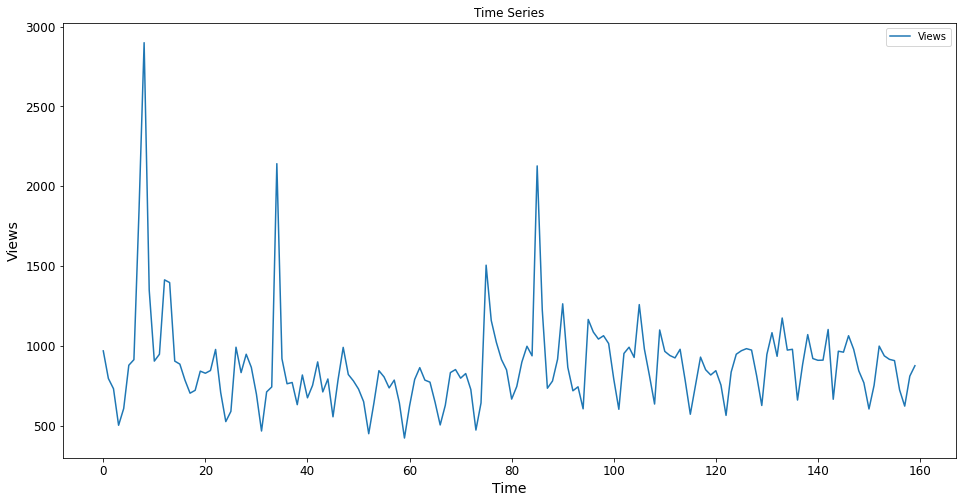

In [28]:
plt.figure(figsize=(16,8))
sample = 200

plt.plot(master_series[sample,:], label = 'Views')
plt.title('Time Series')
plt.xlabel("Time")
plt.ylabel("Views")
plt.legend(loc = 'best')

We see a high range of values in the time series above. So, there is a need to do scaling on the data set.

### 3.2 Scaling of Time Series Data

##### We will first log transform the entire data.

In [29]:
log_master_series = []

for i in range(master_series.shape[0]):
    
    ### There are a lot of 0s in the data. We add 1 to each data point so that log transformation will be proper with even 0s.
    temp_series = np.array(np.log(master_series[i][0:] + 1))
    log_master_series.append(temp_series)
    
log_master_series = np.array(log_master_series) 

print(log_master_series[0,0:10])

log_master_series.shape

[[1.3862944]
 [1.0986123]
 [2.8332133]
 [2.4849067]
 [1.9459102]
 [2.6390574]
 [2.7725887]
 [1.609438 ]
 [1.9459102]
 [2.0794415]]


(102220, 160, 1)

Check the sanity of log transformation done on a sample data

In [30]:
log_master_series[0, :max_steps, 0], log_master_series[0, max_steps - 1 , 0]

(array([1.3862944, 1.0986123, 2.8332133, 2.4849067, 1.9459102, 2.6390574,
        2.7725887, 1.609438 , 1.9459102, 2.0794415, 2.4849067, 1.0986123,
        1.7917595, 1.7917595, 0.6931472, 1.3862944, 2.3025851, 1.7917595,
        0.6931472, 2.1972246, 1.7917595, 2.0794415, 1.3862944, 1.3862944,
        1.0986123, 0.6931472, 1.609438 , 2.3978953, 2.4849067, 1.3862944,
        1.0986123, 0.6931472, 1.609438 , 1.609438 , 1.3862944, 1.9459102,
        1.7917595, 1.7917595, 1.7917595, 1.609438 , 1.3862944, 2.1972246,
        1.609438 , 1.609438 , 2.3025851, 2.5649493, 2.5649493, 1.9459102,
        2.0794415, 2.1972246, 1.0986123, 1.3862944, 1.3862944, 1.0986123,
        0.6931472, 1.0986123, 1.0986123, 1.9459102, 1.0986123, 1.7917595,
        1.9459102, 0.       , 1.9459102, 1.7917595, 1.609438 , 1.609438 ,
        1.609438 , 0.6931472, 1.7917595, 0.6931472, 1.609438 , 1.0986123,
        1.609438 , 1.3862944, 2.0794415, 1.0986123, 1.609438 , 1.7917595,
        2.1972246, 2.3978953, 1.791759

#### We will further normalize the data set to bring the values between 0 and 1 ( MinMax Scaling ).

###### Before that we will split the data in to train, test and validation sets.

First we will train on 150 time steps and forecast the value of 151th time step.

Train Set = 70K time series <br>
Valid Set = 20K time series <br>
Test Set = 10K time series  <br>

In [31]:
np.random.seed(42)

n_steps = 150

predicted_day = n_steps + 1

X_train, y_train = log_master_series[:70000, :n_steps], log_master_series[:70000, n_steps]
X_valid, y_valid = log_master_series[70000:90000, :n_steps], log_master_series[70000:90000, n_steps]
X_test, y_test = log_master_series[90000:100000, :n_steps], log_master_series[90000:100000, n_steps]

In [32]:
X_train.shape, y_train.shape

((70000, 150, 1), (70000, 1))

Let us understand the dimensions of X_train and y_train

X_train: <br>
    
70000 - Number of individual time series ( Total batch size ). <br>
150 - Number of successive days ( time steps ) used for training, in each of the 70K train data. <br>
1   - Number of values ( Here it is univariate, only one variable i.e. view count on that particular day). <br>

y_train: <br>
    
70000 - Number of individual time series ( Total batch size ) <br>
1 - Number of target values for each time series ( We forecast the value for 151th day )


In [33]:
X_valid.shape, y_valid.shape

((20000, 150, 1), (20000, 1))

Before we proceed, let us check one sample of y_valid if it contains the right value from the time series.

70000 was the start of the validation data split from the log_master_series. <br>
So 151th data of 70003th sample from log_master_series should be same as y_valid[3] 

In [34]:
print(predicted_day)

print(log_master_series[70003, predicted_day-1, 0])

print(y_valid[3,0])

151
5.1817837
5.1817837


#### MINMAX NORMALIZATION 

In [35]:

# Get X_train values reshaped in to 2D for scaler
X_train_values = X_train.reshape(-1, 1)

print(X_train_values.shape)

print(min(X_train_values))
print(max(X_train_values))

(10500000, 1)
[0.]
[9.198571]


<AxesSubplot:ylabel='Density'>

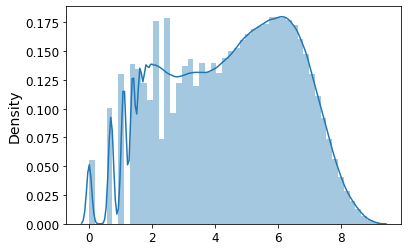

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(X_train_values)

The minimum value of log transformed train data set is 0 and maximum is around 9. <br>
We will fit a minmax scaler over this log transformed train data set to further scaled down all data points in the range of 0-1.

In [37]:
#### MIN MAX NORMALIZATION

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


### Fit on X_train_values and transform 
X_train_normalized = scaler.fit_transform(X_train_values)
#print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))

### Transform y_train
y_train_normalized = scaler.transform(y_train)


### Transform X_Valid
X_valid_values = X_valid.reshape(-1, 1)
X_valid_normalized = scaler.transform(X_valid_values)

### Transform y_valid
y_valid_normalized = scaler.transform(y_valid)


### Transform X_test
X_test_values = X_test.reshape(-1, 1)
X_test_normalized = scaler.transform(X_test_values)

### Transform y_test
y_test_normalized = scaler.transform(y_test)


# Reshape normalized values back to 3-D
X_train = X_train_normalized.reshape(X_train.shape[0] , X_train.shape[1] , X_train.shape[2])
X_valid = X_valid_normalized.reshape(X_valid.shape[0] ,X_valid.shape[1] , X_valid.shape[2])
X_test = X_test_normalized.reshape(X_test.shape[0] ,X_test.shape[1] , X_test.shape[2])

y_train = y_train_normalized.reshape(y_train.shape[0], y_train.shape[1] )
y_valid = y_valid_normalized.reshape(y_valid.shape[0], y_valid.shape[1] )
y_test =  y_test_normalized.reshape(y_test.shape[0], y_test.shape[1] )

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape


((70000, 150, 1),
 (70000, 1),
 (20000, 150, 1),
 (20000, 1),
 (10000, 150, 1),
 (10000, 1))

In [38]:
### Just a sanity check if any training data is Inf due to normalization..
### that will lead to exploding gradients issue while training

for i in range(9999):
   for j in range(21):
      if (np.isfinite(X_train[i,j,0]) == False):
        print(i)

In [39]:
print(X_train[10, 0:5])

[[0.6218696]
 [0.6945167]
 [0.6563923]
 [0.7555365]
 [0.7049612]]


In [40]:
print(y_train[0:5])

[[0.3080058 ]
 [0.22606137]
 [0.6831642 ]
 [0.2606813 ]
 [0.47080502]]


We see values look transformed in range 0-1

In [41]:
#### Function to rescale whatever transformations we have done, 
#### this will be used to retransform the values to original values after forecast.

def reverse_transform(arr):
    
    #print(arr.shape)
    arr = arr.reshape(-1,1)
    
    ## First reverse the minmax scaling
    arr_inv_normal = scaler.inverse_transform(arr)
    #print(arr_inv_normal.shape)
    
    ## Reverse the log transformation and subtract 1 ( Note, we had added 1 earlier)
    arr_reverse = np.exp(arr_inv_normal ) - 1
    #print(arr_reverse.shape)
    return (arr_reverse)

##### Check if reverse_transform works fine by comparing it with the original values of a sample stored in master series

In [42]:
reverse_transform(X_train[0,0:5])

array([[ 3.000001],
       [ 2.      ],
       [16.      ],
       [11.000004],
       [ 6.      ]], dtype=float32)

In [43]:
#new_df.iloc[0][:5]
master_series[0,:5]

array([[ 3.],
       [ 2.],
       [16.],
       [11.],
       [ 6.]], dtype=float32)

In [44]:
reverse_transform(y_valid[0:5])

array([[ 915.9999  ],
       [   3.000001],
       [2129.0005  ],
       [ 177.00003 ],
       [ 107.00001 ]], dtype=float32)

In [45]:
master_series[70000:70005, n_steps, 0]

array([ 916.,    3., 2129.,  177.,  107.], dtype=float32)

In [46]:
X_valid.shape, n_steps

((20000, 150, 1), 150)

#### Plot the last few time steps of X_valid

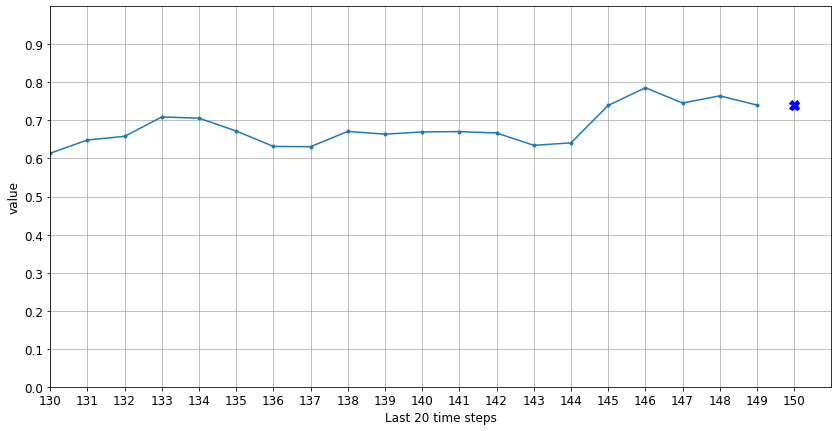

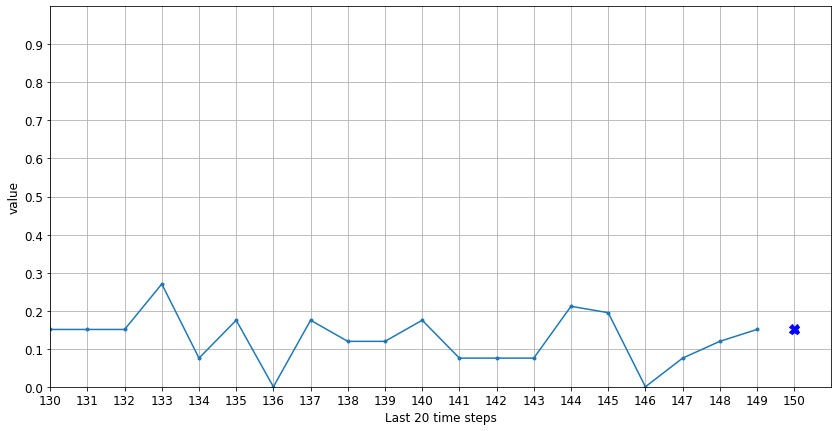

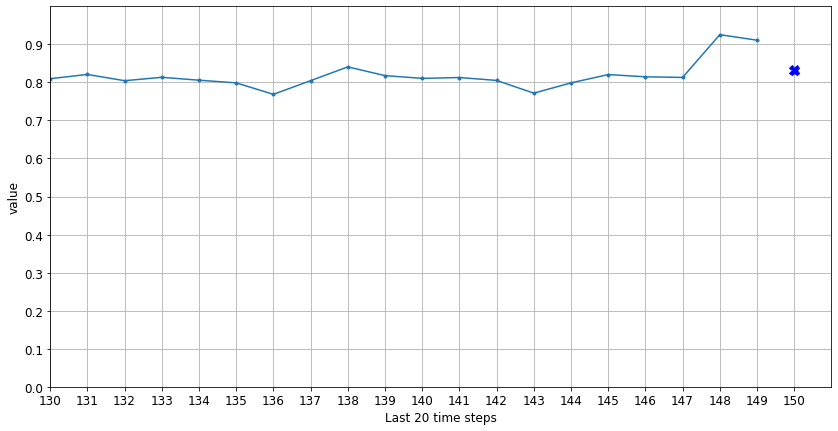

In [47]:

def plot_series(series, y=None, y_pred=None, lag=n_steps, x_label="time steps", y_label="value"):
    
    plt.figure(figsize=(14,7))
    plt.plot(np.arange(n_steps-lag, n_steps), series, ".-")
    
    if y is not None:
        # plot actual y
        plt.plot(n_steps, y, "bX", markersize=10)
        
    if y_pred is not None:
        # plot predicted y
        plt.plot(n_steps, y_pred, "ro")
        
        
    plt.grid(True)
    
    if x_label:
        plt.xlabel(x_label, fontsize=12)
    if y_label:
        plt.ylabel(y_label, fontsize=12, rotation=90)
    
    #plt.axis([0, n_steps, 0, 1])
    
    plt.axis([n_steps-lag, n_steps+1 , 0, 1])
    plt.xticks(np.arange(n_steps-lag, n_steps+1, 1))
    plt.yticks(np.arange(0, 1, 0.1))

for i in range(3):
    plot_series(X_valid[i, n_steps-20 : , 0], y_valid[i, 0],
                lag=20, x_label="Last 20 time steps", y_label=("value"))
    
plt.show()

Now that we have the train data, valid data etc. ready, we are now ready for building models on the time series

## 4. Modeling and Forecast ( single day )

### 4.1 Baseline Models

#### 4.1.1 Naive Forecast

Just predict the last observed value, i.e forecast the value at time step t+1 to be the same value as at time step t.

In [51]:

### Set y_pred equal to the last time step's value.

y_pred = X_valid[:, -1]

### Calculate the MSE of the forecast
naive_mse = round(np.mean(keras.losses.mean_squared_error(y_valid, y_pred)), 7)
naive_mse

0.0029608

##### We get a baseline mean square error of 0.0029608

In [53]:

### Function to plot a single step forecast

def plot_single_forecast(series, y, y_pred, sample, lag = n_steps, x_label = "Time steps", y_label = "Value"):

    plt.figure(figsize=(16,8))

    #plt.plot(np.arange(n_steps-lag, n_steps), reverse_transform(X_valid[i, n_steps-20 : , 0]), ".-", label = 'Original Views')
    plt.plot(np.arange(n_steps - lag, n_steps), series, ".-", label = 'Past ' + str(lag) + ' View Counts')
    plt.plot(n_steps, y, "ro", label = 'Actual = ' + str(y[0,0]))
    plt.plot(n_steps, y_pred, "gx",  label = 'Forecast = '+ str(y_pred[0,0]))
    plt.xticks(np.arange(n_steps - lag, n_steps + 1, 1))
    
    plt.title('Page views count forecast for sample ' + str(sample) + \
              ', for ' + 'day ' + str(n_steps + 1))

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(loc = 'best')

##### Plot the naive forecast for a sample time series

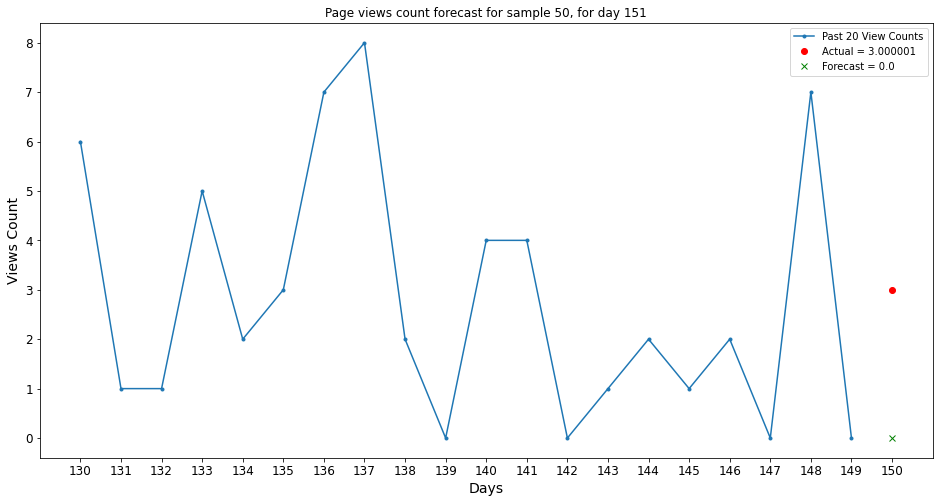

In [54]:
sample=50
lag=20

plot_single_forecast(reverse_transform(X_valid[sample, n_steps - lag : , 0]), \
                     reverse_transform(y_valid[sample]), reverse_transform(y_pred[sample]), \
                     sample = sample, lag = lag, x_label = "Days", y_label = "Views Count")

##### Let us next build a linear regression model using keras 

#### 4.1.2 Linear Model

We use flat layer and a dense output layer to achieve a linear regression model.

Recall that input dimension = batch_size, n_steps, 1

Flat layer flattens the input which consists of n_steps (150 time steps in our case) and feeds those 150 elements to the dense layer with one neuron. So 150 feedforward weights + one bias are involved which is equivalent to a regression equation

y = (W0 * t0) + (W1 * t1) +.......(W149 * t149) + b


In [55]:
np.random.seed(42)
tf.random.set_seed(42)

lin_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[n_steps, 1]),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.Adam(lr=0.0001)

lin_model.compile(loss="mse", optimizer=optimizer)
lin_model.summary()

history_lin = lin_model.fit(X_train, y_train, epochs=50,  batch_size=32,
                    validation_data=(X_valid, y_valid))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 150)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 151       
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
2188/2188 [==============================] - 3s 1ms/step - loss: 0.0081 - val_loss: 0.0054
Epoch 2/50
2188/2188 [==============================] - 2s 1ms/step - loss: 0.0051 - val_loss: 0.0048
Epoch 3/50
2188/2188 [==============================] - 2s 1ms/step - loss: 0.0045 - val_loss: 0.0042
Epoch 4/50
2188/2188 [==============================] - 3s 1ms/step - loss: 0.0040 - val_loss: 0.0038
Epoch 5/50
2188/2188 [==============================] - 3s 1ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 6/50

Plot the learning curve

In [56]:
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)), loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)), val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    #plt.axis([0, 50, 0, 0.6])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)


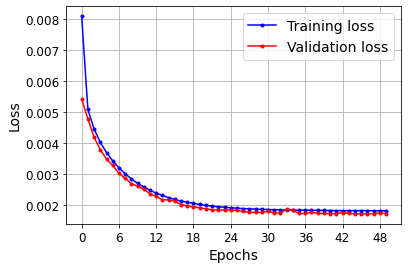

In [59]:

plot_learning_curves(history_lin.history["loss"], history_lin.history["val_loss"])
plt.show()

In [60]:
linear_mse = round(lin_model.evaluate(X_valid, y_valid), 7)
linear_mse

625/625 [==============================] - 1s 937us/step - loss: 0.0017


0.0017274

##### We get a mean square error of  0.0017274 from linear model which is better than the naive forecast which was 0.0029608

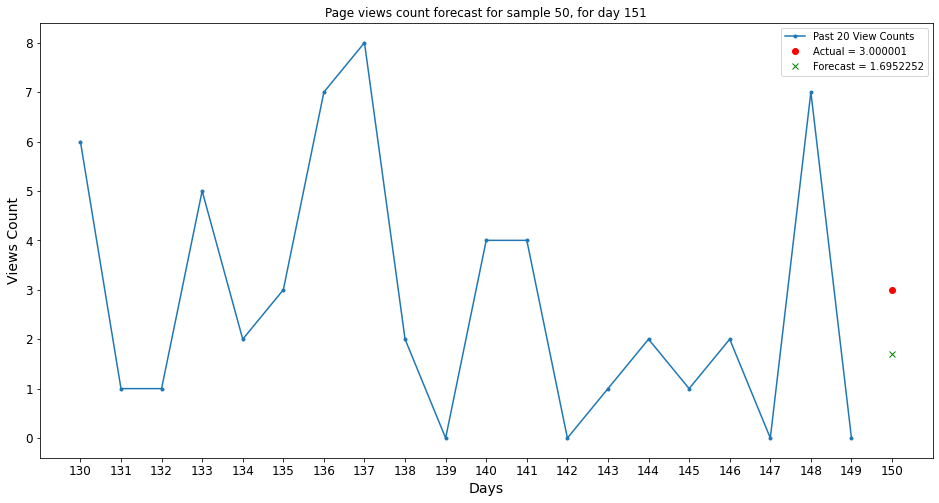

In [61]:
y_pred_lin = lin_model.predict(X_valid)

sample=50
lag=20

plot_single_forecast(reverse_transform(X_valid[sample, n_steps - lag : , 0]), \
                     reverse_transform(y_valid[sample]), reverse_transform(y_pred_lin[sample]), \
                     sample = sample, lag = lag, x_label = "Days", y_label = "Views Count")

We can see that Linear model built by keras NN has given a better closer forecast than the naive forecast model. <br>

Now we will try advanced models, we will start with a simple RNN architecture.

### 4.2 Simple RNN

We will try the simplest RNN with a single layer and a single neuron in it. 

# Numpy Version Issue with Tensorflow Issue on my Machine. So code the issue after this not working

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

simp_rnn_model = keras.models.Sequential([
        keras.layers.SimpleRNN(1, input_shape=[None, 1]) #### RNN with just one neuron ( One day predicted )
])

simp_rnn_model.summary()

optimizer = keras.optimizers.Adam(lr=0.0001)

simp_rnn_model.compile(loss="mse", optimizer=optimizer)

#### Early stop the training if there is no improvement in val_loss for 5 epochs.
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, min_delta=0.0001, verbose=1)

history_srnn = simp_rnn_model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_data=(X_valid, y_valid), callbacks=[early_stopping])

In [ ]:
plot_learning_curves(history_srnn.history["loss"][1:], history_srnn.history["val_loss"][1:])
plt.show()

In [1406]:
simp_rnn_mse = round(simp_rnn_model.evaluate(X_valid, y_valid), 7)
simp_rnn_mse

625/625 [==============================] - 3s 4ms/step - loss: 0.0037


0.0037434

##### We get a mean square error of 0.0037434 from Simple RNN model which is worse than 0.0017274 from linear model.

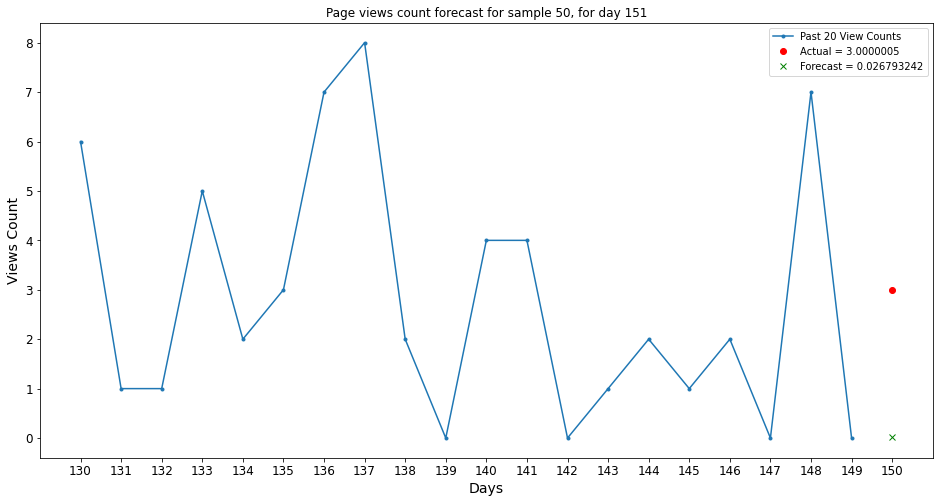

In [1407]:
y_pred_srnn = simp_rnn_model.predict(X_valid)

sample=50
lag=20

plot_single_forecast(reverse_transform(X_valid[sample, n_steps - lag : , 0]), \
                     reverse_transform(y_valid[sample]), reverse_transform(y_pred_srnn[sample]), \
                     sample = sample, lag = lag, x_label = "Days", y_label = "Views Count")


##### The forecast for sample 50 by Simple RNN is not as good as that was by Linear Regression Model..

Let us try a slightly deeper RNN ( add one more layer )

### 4.3 Deep RNN

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)


d_rnn_model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.Dropout(rate=0.2),   ### Otherwise validation loss fluctuates too much
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1)       ### Note dense layer with one output (One day prediction)
])


optimizer = keras.optimizers.Adam(lr=0.0001)

d_rnn_model.compile(loss="mse", optimizer=optimizer)

d_rnn_model.summary()
print()

#### Early stop the training if there is no improvement in val_loss for 5 epochs. Save the best model based on val_loss.
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1)
mc = keras.callbacks.ModelCheckpoint('best_model_drnn.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)


history_drnn = d_rnn_model.fit(X_train, y_train, epochs=50, batch_size=32,
                    validation_data=(X_valid, y_valid), callbacks=[early_stopping, mc])

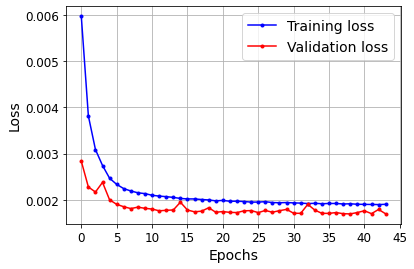

In [1409]:
plot_learning_curves(history_drnn.history["loss"][1:], history_drnn.history["val_loss"][1:])
plt.show()

In [1410]:
d_rnn_model = keras.models.load_model('best_model_drnn.h5')

In [1411]:
round(d_rnn_model.evaluate(X_valid, y_valid), 7)

625/625 [==============================] - 5s 8ms/step - loss: 0.0017


0.0016934

##### We got a mean square error of 0.0016934 from Deep RNN model which is better than simple RNN.

In [1412]:
y_pred_drnn = d_rnn_model.predict(X_valid)

In [1413]:
#y_valid.shape, y_pred.shape, y_pred_drnn.shape

In [1414]:
## Comparison of MSEs of linear regression model, Simple RNN and Deep RNN
print(lin_model.evaluate(X_valid, y_valid))
print(simp_rnn_model.evaluate(X_valid, y_valid))
print(d_rnn_model.evaluate(X_valid, y_valid))

625/625 [==============================] - 0s 501us/step - loss: 0.0017
0.001727364375256002
625/625 [==============================] - 3s 5ms/step - loss: 0.0037
0.0037434406112879515
625/625 [==============================] - 5s 8ms/step - loss: 0.0017
0.0016933754086494446


##### Plot the forecasts of Simple RNN and Deep RNN vs Original values for some time series samples.

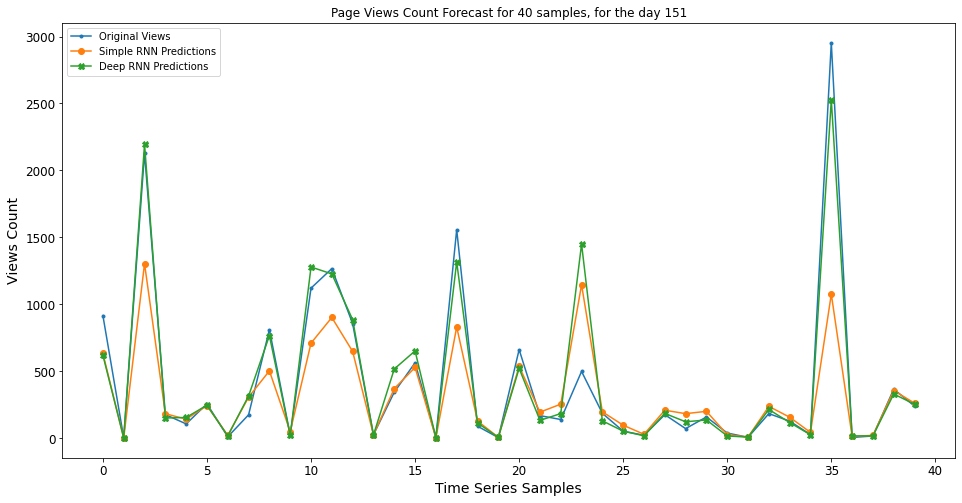

In [1415]:

plt.figure(figsize=(16,8))

num_samples = 40

plt.plot(reverse_transform(y_valid[0:num_samples]), '.-', label = 'Original Views')
#plt.plot(reverse_transform(y_pred_lin[0:num_samples]), '.-', label = 'Linear Model Forecast')
plt.plot(reverse_transform(y_pred_srnn[0:num_samples]), 'o-', label = 'Simple RNN Predictions')
plt.plot(reverse_transform(y_pred_drnn[0:num_samples]), 'X-', label = 'Deep RNN Predictions')
plt.title('Page Views Count Forecast for ' + str(num_samples) + ' samples, for the day ' + str(predicted_day))
plt.xlabel("Time Series Samples")
plt.ylabel("Views Count")
plt.legend(loc = 'best')


We plotted the forecast for 151st day for 40 different time series in the validation set. <br>
We see that Deep RNN forecast is almost closely following the original counts and fares better than simple RNN. <br>
###### So RNNs do a very good job in the forecast.

##### Let us plot the forecast by Deep RNN for a particular sample 

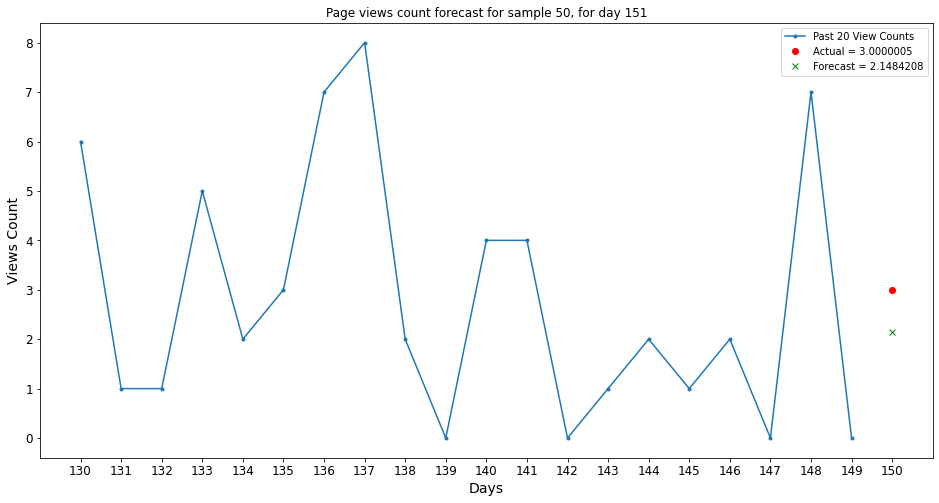

In [1416]:
sample=50
lag=20

plot_single_forecast(reverse_transform(X_valid[sample, n_steps - lag : , 0]), \
                     reverse_transform(y_valid[sample]), reverse_transform(y_pred_drnn[sample]), \
                     sample = sample, lag = lag, x_label = "Days", y_label = "Views Count")


##### The forecast for sample 50, is much better and closer to the original value than simple RNN.

Let us go for a LSTM model now.

### 4.4 LSTM Model

In [112]:
#!pip install numpy==1.19.5
#import numpy as np

In [104]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((70000, 150, 1), (70000, 1), (20000, 150, 1), (20000, 1))

In [1418]:
np.random.seed(42)
tf.random.set_seed(42)

lstm_model = keras.models.Sequential([
    keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.LSTM(20, return_sequences=True),   ###
    keras.layers.LSTM(20),
    keras.layers.Dense(1)   #### Note - Dense layer with one output ( One day prediction )
])

optimizer = keras.optimizers.Adam(lr=0.0005)

lstm_model.compile(loss="mse", optimizer=optimizer)
lstm_model.summary()

#### Early stop the training if there is no improvement in val_loss for 5 epochs. Save the best model based on val_loss.
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1)
mc = keras.callbacks.ModelCheckpoint('best_model_lstm.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)


history_lstm = lstm_model.fit(X_train, y_train, epochs=80, batch_size=32,
                    validation_data=(X_valid, y_valid), callbacks=[early_stopping, mc])


Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_55 (LSTM)               (None, None, 20)          1760      
_________________________________________________________________
lstm_56 (LSTM)               (None, None, 20)          3280      
_________________________________________________________________
lstm_57 (LSTM)               (None, 20)                3280      
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 21        
Total params: 8,341
Trainable params: 8,341
Non-trainable params: 0
_________________________________________________________________
Epoch 1/80
2188/2188 [==============================] - ETA: 0s - loss: 0.0043
Epoch 00001: val_loss improved from inf to 0.00253, saving model to best_model_lstm.h5
2188/2188 [==============================] - 191s 87ms/step - loss: 0.0043 - val_lo

Epoch 32/80
2188/2188 [==============================] - ETA: 0s - loss: 0.0018
Epoch 00032: val_loss did not improve from 0.00166
2188/2188 [==============================] - 182s 83ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 33/80
2188/2188 [==============================] - ETA: 0s - loss: 0.0018
Epoch 00033: val_loss did not improve from 0.00166
2188/2188 [==============================] - 183s 83ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 00033: early stopping


Load the best model saved during the training

In [1419]:
lstm_model = keras.models.load_model('best_model_lstm.h5')

In [1420]:
round(lstm_model.evaluate(X_valid, y_valid), 7)

625/625 [==============================] - 10s 17ms/step - loss: 0.0017


0.0016625

##### We have got a MSE of 0.0016625 with LSTM which looks slightly better than Deep RNN .

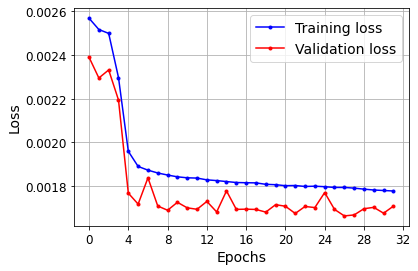

In [1421]:
plot_learning_curves(history_lstm.history["loss"][1:], history_lstm.history["val_loss"][1:])
plt.show()

Predict on the validation set

In [1422]:
y_pred_lstm = lstm_model.predict(X_valid)

In [1423]:
y_pred_lstm.shape, y_pred_drnn.shape

((20000, 1), (20000, 1))

In [1424]:
#### Compare the MSE (loss) of the various models we have trained so far

print(lin_model.evaluate(X_valid, y_valid))
print(simp_rnn_model.evaluate(X_valid, y_valid))
print(d_rnn_model.evaluate(X_valid, y_valid))
print(lstm_model.evaluate(X_valid, y_valid))

625/625 [==============================] - 0s 436us/step - loss: 0.0017
0.001727364375256002
625/625 [==============================] - 3s 5ms/step - loss: 0.0037
0.0037434406112879515
625/625 [==============================] - 5s 8ms/step - loss: 0.0017
0.0016933754086494446
625/625 [==============================] - 11s 17ms/step - loss: 0.0017
0.0016624598065391183


##### Plot the forecasts of LSTM vs Original values for some time series samples.

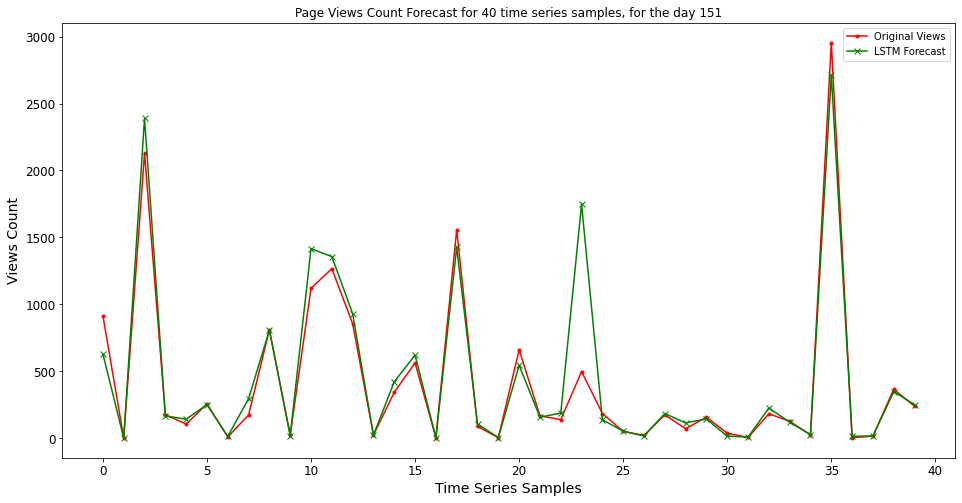

In [1425]:

plt.figure(figsize=(16,8))

num_samples = 40

plt.plot(reverse_transform(y_valid[0:num_samples]), 'r.-', label = 'Original Views')
#plt.plot(np.exp(y_pred_srnn[0:num_samples]), label = 'Simple RNN Predictions')
#plt.plot(reverse_transform(y_pred_drnn[0:num_samples]), 'o-', label = 'Deep RNN Predictions')
plt.plot(reverse_transform(y_pred_lstm[0:num_samples]), 'gx-', label = 'LSTM Forecast')


plt.title('Page Views Count Forecast for ' + str(num_samples) + ' time series samples, for the day ' + str(predicted_day))
plt.xlabel("Time Series Samples")
plt.ylabel("Views Count")
plt.legend(loc = 'best')


#### Above plot of original values vs Forecast values show that LSTM has done a very good job in forecasting the values for the 151st day across different time series samples.

Let us examine the forecast for a particular time series by LSTM.

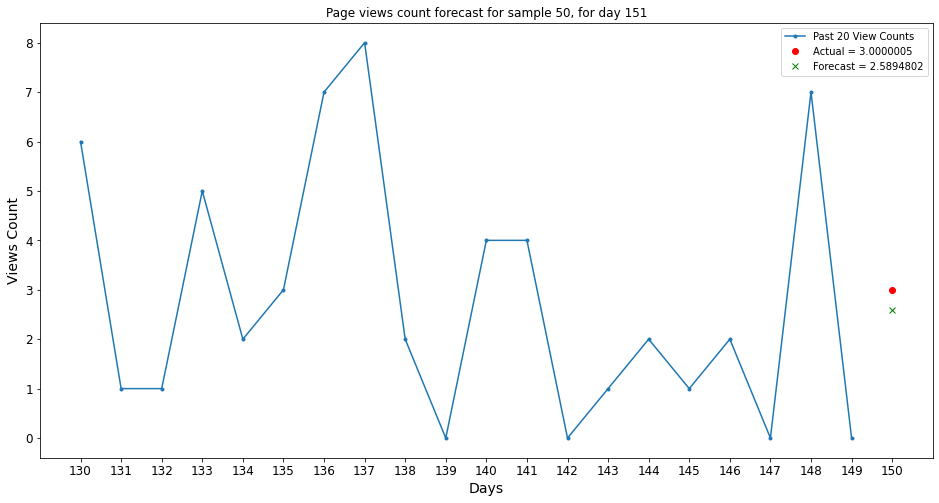

In [1426]:
sample=50
lag=20

plot_single_forecast(reverse_transform(X_valid[sample, n_steps - lag : , 0]), \
                     reverse_transform(y_valid[sample]), reverse_transform(y_pred_lstm[sample]), \
                     sample = sample, lag = lag, x_label = "Days", y_label = "Views Count")

##### The forecast for sample 50 by LSTM , is the closest to the actual value compared to all the models we tried so far !

## 5. Forecasting For Several Time Steps (days) ahead

We will now forecast for multiple number of days (k days in one go) i.e days n+1, n+2....n+k by training on the first n days data.

### 5.1 Train on 'n' days values as a whole and forecast for days n+1, n+2.....

In [1427]:
log_master_series.shape

(102220, 160, 1)

For this, y_train, y_valid and y_test have to have multiple days values as target instead of one day 

In [1428]:

np.random.seed(42)

num_days_predicted = 3

##### Take from log_master_series as we have to do min max scaling on the target (y) values.

series = log_master_series[:, : n_steps + num_days_predicted, :]
series.shape

y_train_mult = series[:70000, -num_days_predicted:, 0]

y_valid_mult = series[70000:90000, -num_days_predicted:, 0]

y_test_mult =  series[90000:100000, -num_days_predicted:, 0]

print(y_train_mult.shape)

(70000, 3)


##### As we see above, we will predict for 3 days - days 151, 152, 153. So each time series will have 3 values as target

In [1429]:
### Min max scaler transformation over the log transformation.

y_train_normalized = scaler.transform(y_train_mult.reshape(-1,1))
y_train_mult = y_train_normalized.reshape(y_train_mult.shape[0], y_train_mult.shape[1])
print(y_train_mult.max())
print(y_train_mult.min())
print()

y_valid_normalized = scaler.transform(y_valid_mult.reshape(-1,1))
y_valid_mult = y_valid_normalized.reshape(y_valid_mult.shape[0], y_valid_mult.shape[1])
print(y_valid_mult.max())
print(y_valid_mult.min())
print()


y_test_normalized = scaler.transform(y_test_mult.reshape(-1,1))
y_test_mult = y_test_normalized.reshape(y_test_mult.shape[0], y_test_mult.shape[1])
print(y_test_mult.max())
print(y_test_mult.min())
print()

0.99998903
0.0

0.99976885
0.0

0.999934
0.0



Check the sanity of transformations

In [1430]:
master_series[70035, n_steps:n_steps + num_days_predicted, 0]

array([2954., 2633., 2705.], dtype=float32)

In [1431]:
reverse_transform(y_valid_mult[35,:])

array([[2953.9998],
       [2633.    ],
       [2705.    ]], dtype=float32)

#### Train a LSTM model 

In [1482]:
np.random.seed(42)
tf.random.set_seed(42)

lstm_mult_model1 = keras.models.Sequential([
    keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.LSTM(20, return_sequences=True), ####
    keras.layers.Dropout(rate=0.2), ####
    keras.layers.LSTM(20),
    keras.layers.Dense(num_days_predicted)   #### Note - Number of Output = Number of days predicted.
])

optimizer = keras.optimizers.Adam(lr=0.0005)
lstm_mult_model1.compile(loss="mse", optimizer = optimizer)

lstm_mult_model1.summary()
print()

#### Early stop the training if there is no improvement in val_loss for 5 epochs. Save the best model based on val_loss.
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1)
mc = keras.callbacks.ModelCheckpoint('best_model_mult_lstm.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)


history_mult_lstm1 = lstm_mult_model1.fit(X_train, y_train_mult, epochs=80, batch_size=32,
                    validation_data=(X_valid, y_valid_mult), callbacks=[early_stopping, mc])


Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_67 (LSTM)               (None, None, 20)          1760      
_________________________________________________________________
lstm_68 (LSTM)               (None, None, 20)          3280      
_________________________________________________________________
dropout_20 (Dropout)         (None, None, 20)          0         
_________________________________________________________________
lstm_69 (LSTM)               (None, 20)                3280      
_________________________________________________________________
dense_32 (Dense)             (None, 3)                 63        
Total params: 8,383
Trainable params: 8,383
Non-trainable params: 0
_________________________________________________________________

Epoch 1/80
2188/2188 [==============================] - ETA: 0s - loss: 0.0056
Epoch 00001: val_loss improved from i

Epoch 30/80
2188/2188 [==============================] - ETA: 0s - loss: 0.0021
Epoch 00030: val_loss did not improve from 0.00198
2188/2188 [==============================] - 192s 88ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 31/80
2188/2188 [==============================] - ETA: 0s - loss: 0.0021
Epoch 00031: val_loss did not improve from 0.00198
2188/2188 [==============================] - 193s 88ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 32/80
2188/2188 [==============================] - ETA: 0s - loss: 0.0021
Epoch 00032: val_loss did not improve from 0.00198
2188/2188 [==============================] - 188s 86ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 33/80
2188/2188 [==============================] - ETA: 0s - loss: 0.0021
Epoch 00033: val_loss did not improve from 0.00198
2188/2188 [==============================] - 188s 86ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 34/80
2188/2188 [==============================] - ETA: 0s - loss: 0.0021
Epoch 00034: val_los

Load the best model saved during training

In [1483]:
lstm_mult_model1 = keras.models.load_model('best_model_mult_lstm.h5')

##### Evaluate the MSE on the validation set

In [1484]:
lstm_mult_model1.evaluate(X_valid, y_valid_mult)

625/625 [==============================] - 10s 17ms/step - loss: 0.0020


0.0019774034153670073

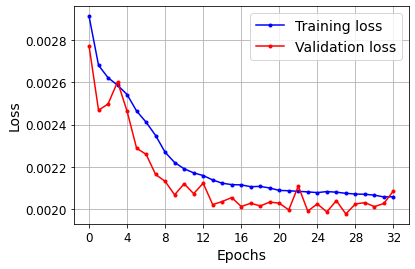

In [1485]:
plot_learning_curves(history_mult_lstm1.history["loss"][1:], history_mult_lstm1.history["val_loss"][1:])
plt.show()

##### Predict on the validation set and check on one of the samples.

In [1486]:
y_pred_mult_lstm = lstm_mult_model1.predict(X_valid)

In [1487]:
y_pred_mult_lstm.shape

(20000, 3)

In [1488]:
sample_tested = 1000
reverse_transform(y_valid_mult[sample_tested])

array([[1571.9996],
       [1933.9998],
       [2938.0012]], dtype=float32)

In [1489]:
reverse_transform(y_pred_mult_lstm[sample_tested])

array([[1545.2772],
       [1941.6001],
       [3190.0635]], dtype=float32)

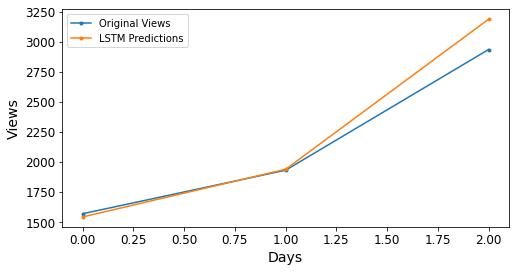

In [1490]:
plt.figure(figsize=(8,4))


plt.plot(reverse_transform(y_valid_mult[sample_tested]),  ".-", label = 'Original Views')
plt.plot(reverse_transform(y_pred_mult_lstm[sample_tested]),  ".-", label = 'LSTM Predictions')

plt.xlabel("Days")
plt.ylabel("Views")
plt.legend(loc = 'best')

In [1441]:
    
#### Function to plot multiple days forecast

def plot_multiple_forecast(series, y, y_pred, sample, lag = n_steps, num_days_predicted =3, \
                           x_label = "Time steps", y_label = "Value"):

    plt.figure(figsize=(16,8))

    plt.plot(np.arange(n_steps - lag, n_steps), series, ".-", label = 'Past ' + str(lag) + ' View Counts')
    
    plt.plot(np.arange(n_steps, n_steps + num_days_predicted), y, "ro-", label = 'Actual')
    
    plt.plot(np.arange(n_steps, n_steps + num_days_predicted),y_pred, "gx-",  label = 'LSTM Forecasts')

    plt.xticks(np.arange(n_steps - lag, n_steps + num_days_predicted + 1, 1))
    
    plt.title('Page views count forecast for sample ' + str(sample) + \
              ', for ' + 'days ' + str(n_steps + 1) + " to "+ str(n_steps + num_days_predicted))

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(loc = 'best')

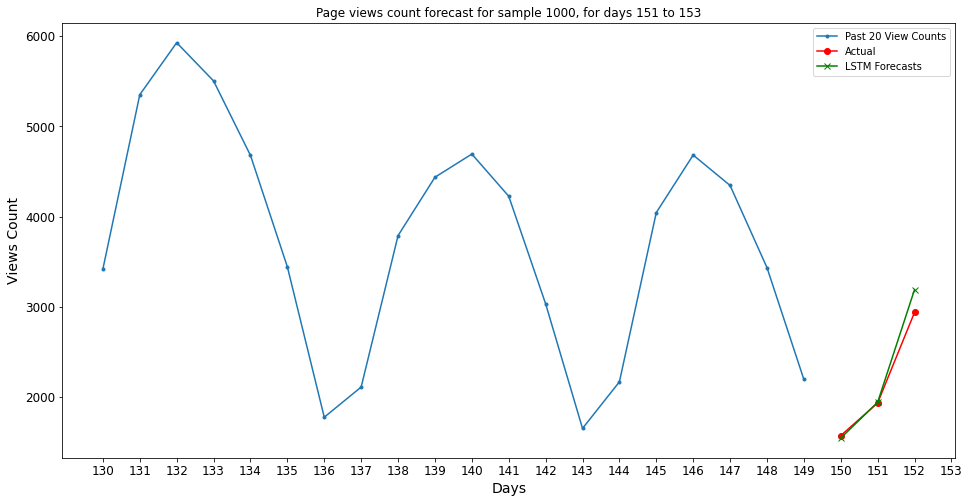

In [1491]:
plot_multiple_forecast( reverse_transform(X_valid[sample_tested, n_steps-lag:, 0]), 
                       reverse_transform( y_valid_mult[sample_tested] ),
                       reverse_transform( y_pred_mult_lstm[sample_tested] ),
                       sample=sample_tested, lag=lag, x_label = "Days", y_label = "Views Count")

##### We see that LSTM has done a nice job of forecasting values close to the actuals !

In [1492]:
y_valid_mult.shape, y_pred_mult_lstm.shape

((20000, 3), (20000, 3))

In [1493]:
num_samples = 40
step_ahead = 1

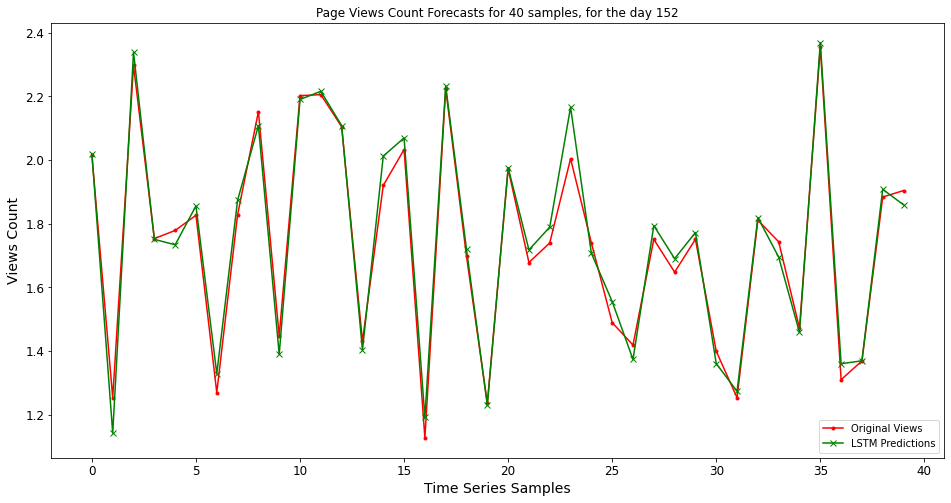

In [1494]:
plt.figure(figsize=(16,8))


assert step_ahead < num_days_predicted
     
predicted_day = n_steps + step_ahead + 1

plt.plot(np.exp(y_valid_mult[0:num_samples, step_ahead]), "r.-", label = 'Original Views')
plt.plot(np.exp(y_pred_mult_lstm[0:num_samples, step_ahead]), "gx-", label = 'LSTM Predictions')

plt.title('Page Views Count Forecasts for ' + str(num_samples) + ' samples, for the day ' + str(predicted_day))
plt.xlabel("Time Series Samples")
plt.ylabel("Views Count")
plt.legend(loc = 'best')

### 5.2 Sequence-to-Sequence Model - Train on 'n' days values, forecasting next k values at each time step (day).

Here, we will train the LSTM in the following way.

1. For each time step t starting from t=0, pass the value to LSTM and forecast values for next 3 time steps. i.e t+1,t+2,t+3.
2. Do (1) for time steps till time step 150.
3. After training the model, forecast the values for days 151, 152 and 153.

This model architecture will be different from preceding models. Instead of training the model to forecast next 3 values only at the very last time step, we train it to forecast the next 3 values at each and every time step. 

#### So, the preceding models were sequence-to-vector RNNs while this will be a sequence-to-sequence RNN.

The advantage of this technique is that the loss will contain a term for the output at each and every time step, not only at the last time step. So there will be more error gradients flowing through the model. They will also flow from the output of each time step. This can stabilise the training process.

In [1450]:
samples_count

100000

Each target in the training set ( we have 70K time series in the training set, so 70K targets ) must be a sequence of same length as the input sequence (i.e. 150) containing a 3-dimensional vector at each step.

In [1451]:

series.shape
Y = np.empty((samples_count, n_steps, num_days_predicted))

for step_ahead in range(1, num_days_predicted + 1):
   Y[..., step_ahead - 1] = series[:samples_count, step_ahead:step_ahead + n_steps, 0]
    


Y_train = Y[:70000]
Y_valid = Y[70000:90000]
Y_test = Y[90000:100000]


Y_train_normalized = scaler.transform(Y_train.reshape(-1,1))
Y_train_mult = Y_train_normalized.reshape(Y_train.shape[0], Y_train.shape[1], Y_train.shape[2])
print(Y_train_mult.max())
print(Y_train_mult.min())
print()


Y_valid_normalized = scaler.transform(Y_valid.reshape(-1,1))
Y_valid_mult = Y_valid_normalized.reshape(Y_valid.shape[0], Y_valid.shape[1], Y_valid.shape[2])
print(Y_valid_mult.max())
print(Y_valid_mult.min())
print()


Y_test_normalized = scaler.transform(Y_test.reshape(-1,1))
Y_test_mult = Y_test_normalized.reshape(Y_test.shape[0], Y_test.shape[1], Y_test.shape[2])
print(Y_test_mult.max())
print(Y_test_mult.min())
print()




1.0000000315894653
0.0

0.9999450831205792
0.0

0.999989041895688
0.0



In [1452]:
Y_train_mult.shape, X_valid.shape, Y_valid_mult.shape

((70000, 150, 3), (20000, 150, 1), (20000, 150, 3))

Check the sanity of the transformations

In [1453]:
reverse_transform(Y_valid_mult[50,0])

array([[4.00000015],
       [5.99999963],
       [5.00000013]])

In [1454]:
reverse_transform(X_valid[50,1]), reverse_transform(X_valid[50,2]), reverse_transform(X_valid[50,3])

(array([[4.]], dtype=float32),
 array([[5.9999995]], dtype=float32),
 array([[5.]], dtype=float32))

#### Train a LSTM model

To turn the model into a sequence-to-sequence model, we must set return_sequence=True in all recurrent layers including the last one and we must apply the last layer (output) at every time step. So we use Keras TimeDistributed layer for this purpose.

In [1468]:
np.random.seed(42)
tf.random.set_seed(42)

lstm_mult_model2 = keras.models.Sequential([
    keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.LSTM(20, return_sequences=True),
    keras.layers.Dropout(rate=0.2),
    keras.layers.LSTM(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(num_days_predicted))
])

def last_time_step_mse(y_true_my, y_pred_my):
    return keras.metrics.mean_squared_error(y_true_my[:, -1], y_pred_my[:, -1])

optimizer = keras.optimizers.Adam(lr=0.0005)

lstm_mult_model2.compile(loss="mse", optimizer= optimizer, metrics=[last_time_step_mse])

lstm_mult_model2.summary()

#early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.000005, patience=5, verbose=1)
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1)
mc = keras.callbacks.ModelCheckpoint('best_model_mult_lstm2.h5', monitor='val_last_time_step_mse', mode='min', verbose=1, save_best_only=True)

history_mult_lstm2 = lstm_mult_model2.fit(X_train, Y_train_mult, epochs=80, batch_size=32,
                    validation_data=(X_valid, Y_valid_mult), callbacks=[early_stopping, mc])


Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_64 (LSTM)               (None, None, 20)          1760      
_________________________________________________________________
lstm_65 (LSTM)               (None, None, 20)          3280      
_________________________________________________________________
dropout_19 (Dropout)         (None, None, 20)          0         
_________________________________________________________________
lstm_66 (LSTM)               (None, None, 20)          3280      
_________________________________________________________________
time_distributed_5 (TimeDist (None, None, 3)           63        
Total params: 8,383
Trainable params: 8,383
Non-trainable params: 0
_________________________________________________________________
Epoch 1/80
2188/2188 [==============================] - ETA: 0s - loss: 0.0087 - last_time_step_mse: 0.0053
Epoch 000

Epoch 21/80
2188/2188 [==============================] - ETA: 0s - loss: 0.0022 - last_time_step_mse: 0.0021
Epoch 00021: val_last_time_step_mse did not improve from 0.00205
2188/2188 [==============================] - 187s 85ms/step - loss: 0.0022 - last_time_step_mse: 0.0021 - val_loss: 0.0022 - val_last_time_step_mse: 0.0021
Epoch 22/80
2188/2188 [==============================] - ETA: 0s - loss: 0.0022 - last_time_step_mse: 0.0021
Epoch 00022: val_last_time_step_mse improved from 0.00205 to 0.00204, saving model to best_model_mult_lstm2.h5
2188/2188 [==============================] - 192s 88ms/step - loss: 0.0022 - last_time_step_mse: 0.0021 - val_loss: 0.0022 - val_last_time_step_mse: 0.0020
Epoch 23/80
2188/2188 [==============================] - ETA: 0s - loss: 0.0022 - last_time_step_mse: 0.0021
Epoch 00023: val_last_time_step_mse did not improve from 0.00204
2188/2188 [==============================] - 186s 85ms/step - loss: 0.0022 - last_time_step_mse: 0.0021 - val_loss: 0.00

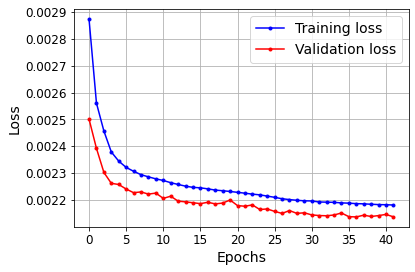

In [1471]:
plot_learning_curves(history_mult_lstm2.history["loss"][1:], history_mult_lstm2.history["val_loss"][1:])
plt.show()

Looks like training was more stable without much fluctuations in this model 

In [1472]:
dependencies = {
    'last_time_step_mse': last_time_step_mse
}

lstm_mult_model2 = keras.models.load_model('best_model_mult_lstm2.h5', custom_objects=dependencies)

In [1473]:
lstm_mult_model2.evaluate(X_valid, Y_valid_mult)

625/625 [==============================] - 11s 17ms/step - loss: 0.0021 - last_time_step_mse: 0.0020


[0.0021419511176645756, 0.0019617003854364157]

In [1474]:
y_pred_mult_lstm2 = lstm_mult_model2.predict(X_valid)

In [1475]:
y_pred_mult_lstm2.shape

(20000, 150, 3)

In [1476]:
#sample_tested = 800
reverse_transform(Y_valid_mult[sample_tested, n_steps-1])

array([[1571.99969309],
       [1933.9998166 ],
       [2937.9997606 ]])

In [1477]:
reverse_transform(y_pred_mult_lstm2[sample_tested, n_steps-1])

array([[1459.253 ],
       [1910.4663],
       [3398.7083]], dtype=float32)

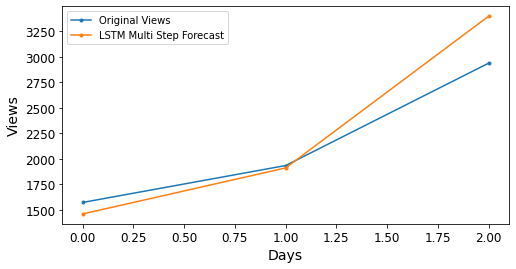

In [1478]:
plt.figure(figsize=(8,4))
plt.plot(reverse_transform(Y_valid_mult[sample_tested, n_steps-1]),  ".-", label = 'Original Views')

plt.plot(reverse_transform(y_pred_mult_lstm2[sample_tested, n_steps-1]),  ".-", label = 'LSTM Multi Step Forecast')

plt.xlabel("Days")
plt.ylabel("Views")
plt.legend(loc = 'best')

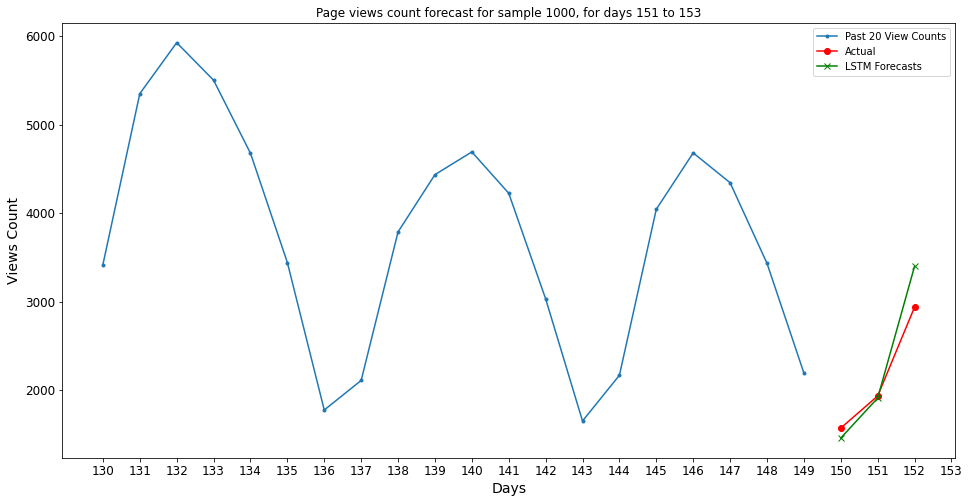

In [1495]:
plot_multiple_forecast( reverse_transform(X_valid[sample_tested, n_steps-lag:, 0]), 
                       reverse_transform( Y_valid_mult[sample_tested, n_steps-1]),
                       reverse_transform( y_pred_mult_lstm2[sample_tested, n_steps-1]),
                       sample=sample_tested, lag=lag, x_label = "Days", y_label = "Views Count")


In [1480]:
num_samples = 40
step_ahead = 1

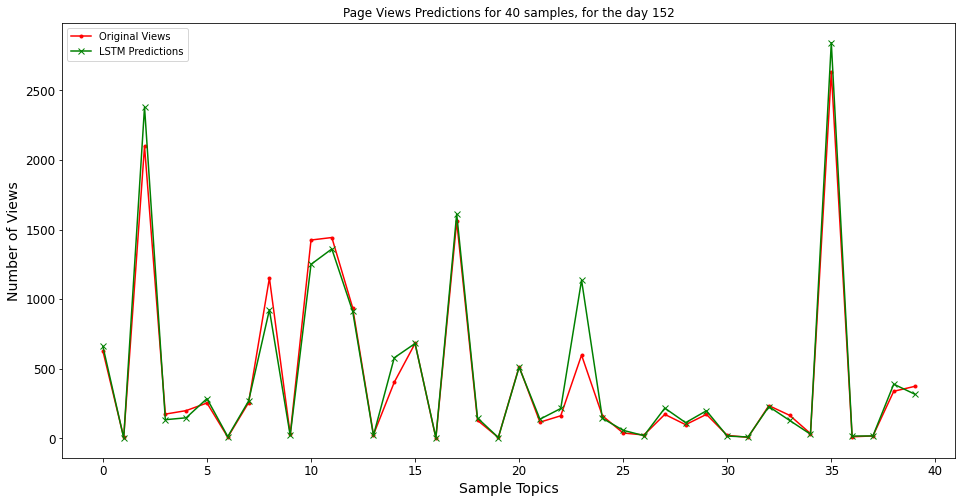

In [1481]:
plt.figure(figsize=(16,8))

assert step_ahead < num_days_predicted
     
predicted_day = n_steps + step_ahead + 1

plt.plot(reverse_transform(Y_valid_mult[0:num_samples, n_steps - 1, step_ahead]), "r.-", label = 'Original Views')
plt.plot(reverse_transform(y_pred_mult_lstm2[0:num_samples, n_steps - 1, step_ahead]), "gx-", label = 'LSTM Predictions')

plt.title('Page Views Predictions for ' + str(num_samples) + ' samples, for the day ' + str(predicted_day))
plt.xlabel("Sample Topics")
plt.ylabel("Number of Views")
plt.legend(loc = 'best')